In [20]:
from scipy import stats
%matplotlib inline
import datetime
import calendar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns; sns.set(color_codes=True)


features:  

|      feature      | Description | 
|------------|-----|
| weight_oz | Total weight in ounces (target) |
| calories | approximate calories consumed on that date. Calorie counts were taken for each food based on nutritional information and rounded up to the nearest 50 to facilitate easy record keeping. Where nutritional information was not available, calorie counts were estimated from previous experience and best guesses of ingredients and comparison to meals with available nutritional information. |
| cals_per_oz | calories per ounce - calories for that day divided by weight in ounces |
| five_donuts | day where main meal was bag of five jam donuts, 1 = TRUE, 0 = FALSE |
| walk | day included at least one brisk walk of over 20 minutes, 1 = TRUE, 0 = FALSE |
| run | day included at one short run of 2.5 miles, 1 = TRUE, 0 = FALSE |
| wine | day finished with at least one large glass of wine when not accompanied by other fluids, 1 = TRUE, 0 = FALSE |
| prot | day involved what would be considered a high protein diet, 1 = TRUE, 0 = FALSE |
| weight | signifies day during period of weight-based exercise; includes rest days as part of period, 1 = TRUE, 0 = FALSE |

In [12]:
dataset = pd.read_csv('diet_data.csv')

# Analysis

In [3]:
dataset.head(1000)

,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,weight_oz
0,1950.000000,0.720000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,2726.000000
1,2600.000000,0.960000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,2696.000000
2,2500.000000,0.920000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,2704.000000
3,1850.000000,0.680000,1.000000,1.000000,0.000000,1.000000,0.0,0.0,2704.000000
4,2900.000000,1.090000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,2664.000000
...,...,...,...,...,...,...,...,...,...
271,3856.636346,1.397433,0.588898,0.588898,0.000000,0.000000,0.0,0.0,2761.422369
272,1433.180556,0.523272,0.000000,1.000000,0.331806,0.000000,0.0,0.0,2748.681944
273,1706.276517,0.618968,1.000000,0.822872,1.000000,0.000000,0.0,1.0,2736.354255
274,3785.876297,1.382853,1.000000,1.000000,0.000000,0.606277,0.0,0.0,2740.850218


In [4]:
dataset.describe()

,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,weight_oz
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,3045.588505,1.132743,0.465694,0.720240,0.224411,0.306945,0.129528,0.403668,2690.379364
std,1208.424134,0.449687,0.459572,0.422030,0.384903,0.423114,0.318260,0.452039,35.085993
min,1400.000000,0.510000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000
25%,2189.319900,0.810000,0.000000,0.256817,0.000000,0.000000,0.000000,0.000000,2662.000000
50%,2600.000000,0.965000,0.377903,1.000000,0.000000,0.000000,0.000000,0.111308,2689.000000
75%,3709.285216,1.371081,1.000000,1.000000,0.347050,0.793181,0.000000,1.000000,2720.250111
max,7550.000000,2.810000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2768.000000


In [13]:
#dropping prot column since it holds no values
dataset.drop('prot', axis=1, inplace=True)

#Rounding numbers to 1 and 0
for col in dataset.columns[2:-1]:
    dataset = dataset[(dataset[col] == 0) | (dataset[col] == 1)]


<AxesSubplot:>

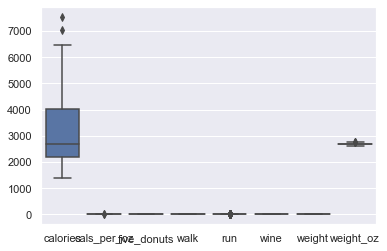

In [14]:
sns.boxplot(data=dataset)

In [9]:
# Deleting extreme outliers
dataset = dataset[(np.abs(stats.zscore(dataset)) < 5).all(axis=1)]
dataset.describe()

,calories,cals_per_oz,five_donuts,walk,run,wine,weight,weight_oz
count,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000,136.000000
mean,3205.583845,1.191825,0.389706,0.698529,0.220588,0.316176,0.433824,2689.886040
std,1390.359402,0.517463,0.489486,0.460593,0.416176,0.466702,0.497434,28.419563
min,1400.000000,0.510000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000
25%,2200.000000,0.810000,0.000000,0.000000,0.000000,0.000000,0.000000,2672.000000
50%,2675.000000,0.995000,0.000000,1.000000,0.000000,0.000000,0.000000,2690.000000
75%,4025.000000,1.510000,1.000000,1.000000,0.000000,1.000000,1.000000,2704.500000
max,7550.000000,2.810000,1.000000,1.000000,1.000000,1.000000,1.000000,2768.000000


<AxesSubplot:>

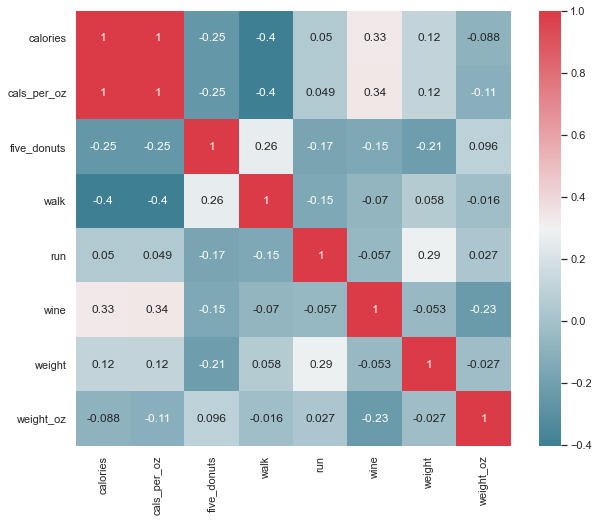

In [15]:
# Correlation between features - heatmap
f, ax = plt.subplots(figsize=(10, 8))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

#As expected there is a big correlation calories and clas_per_oz. Biggest influence on target feature comes from drinking of wine and going on a run
#Kan je weglaten:
#Calories feauture could potentially be dropped because it has same impact on other feautures as cals_per_oz

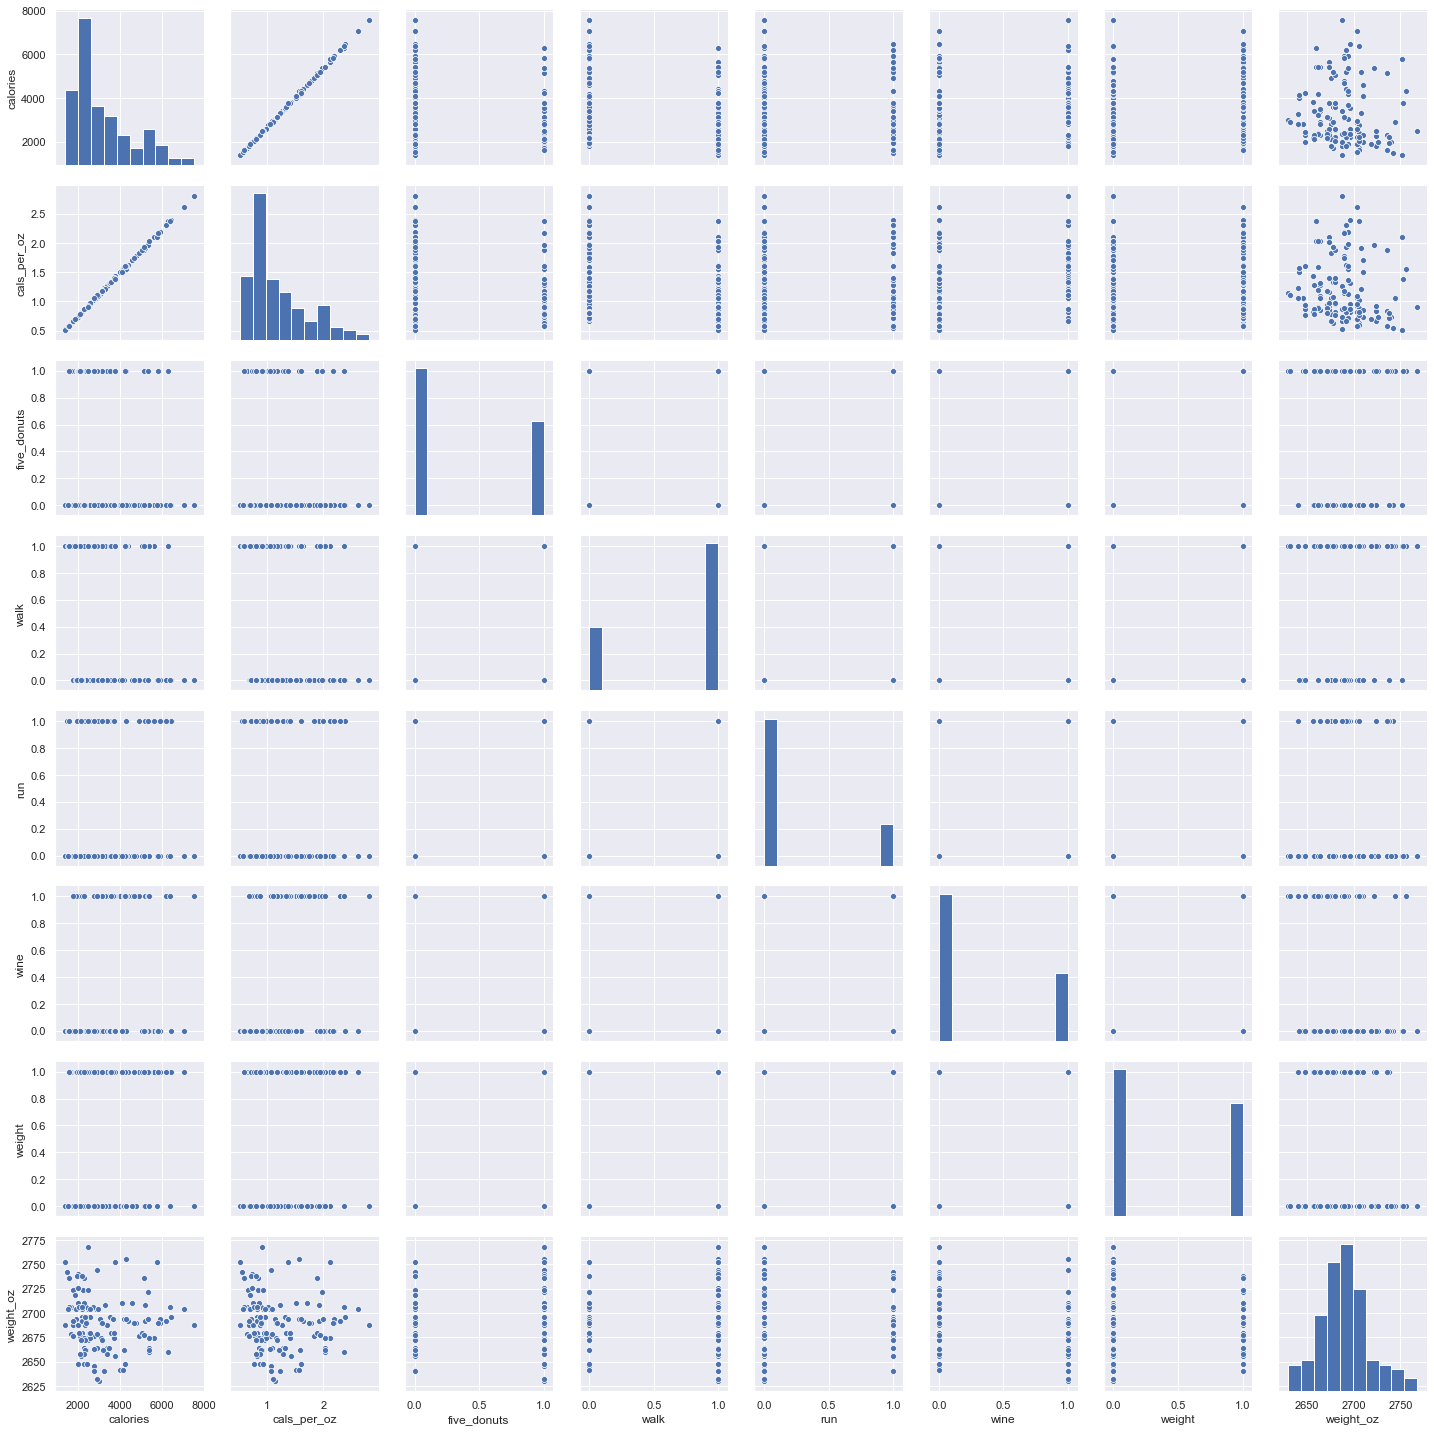

In [9]:
sns.pairplot(dataset);
#Here we can again clearly see the connection between calories and cals_per_oz 


# Preproccessing

In [16]:
# Splitting targets and features
features = list(dataset.columns[:dataset.columns.size-1])
print(features)
X = dataset[features].values 
y= dataset['weight_oz'].values
print(X.shape)

['calories', 'cals_per_oz', 'five_donuts', 'walk', 'run', 'wine', 'weight']
(136, 7)


In [17]:
# Splitting train and testset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [18]:
#using the minmaxscaler since it keeps our 0 and 1 values
scaler = preprocessing.MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Training

In [21]:
# Training simple basic model
lregmodel = linear_model.LinearRegression()
lregmodel.fit(X_train,y_train)

LinearRegression()

In [15]:
# Evaluating het model
y_predicted = lregmodel.predict(X_test)
#MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,y_predicted)
print('MAE = ',MAE)

#MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_predicted)
print('MSE = ',MSE)

#R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_predicted)
print('r2 score = ',r2)

#Model wil on average miss target with 10.2 oz and can predict the score with 73% determination


MAE =  10.29994013333767
MSE =  172.97304219934247
r2 score =  0.7326158145698993


Wat is haar gewicht indien ze op een dag:  
2550.0 calories consumeert aan 0.82 alories per ounce, ze 5 donuts eet, ze niet gaat wandelen maar wel gaat lopen, ze wijn drinkt, niet aan het proteine dieet doet maar wel gewichtheft?
									

In [22]:
# Modeloptimalisation and Hyperparameter tuning (Manual for experimental purposus, could use cross validation)

# Higher order features
grade = 2

poly = PolynomialFeatures(grade)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
print('dimension X_train_poly: ',X_train_poly.shape)
print('dimension X_test_poly: ', X_test_poly.shape)


# L2 regularisation with Ridge regression
lregmodel_poly = Ridge(alpha=0,tol=0.0001,fit_intercept=True)
lregmodel_poly.fit(X_train_poly,y_train)

print('R2 score with L2: ',lregmodel_poly.score(X_test_poly,y_test))
# R2 -score with L2 on trainingset
print('R2 score on training set with L2: ',lregmodel_poly.score(X_train_poly,y_train))

# Prediction of weight. After optimalisation
day = np.array([2550.0, 0.82, 1, 0, 1, 1,1])
day=day.reshape(1,-1)
day = scaler.transform(day)
day = poly.transform(day)
weight_oz = lregmodel_poly.predict(day)
print(f'Weight prediction with ridge in oz:{weight_oz} (kg:{weight_oz*0.02834952}) ')

#  L1 regularisatie with Lasso regression
lregmodel_poly = Lasso(alpha=0,tol=0.00001,fit_intercept=True)
lregmodel_poly.fit(X_train_poly,y_train)      
  
      
print('R2 score with L1: ',lregmodel_poly.score(X_test_poly,y_test))
  
# R2 -score with L1 on trainingset
print('R2 score on training set with L1: ',lregmodel_poly.score(X_train_poly,y_train))


# Prediction of weight. After optimalisation
day = np.array([2550.0, 0.82, 1, 0, 1, 1,1])
day=day.reshape(1,-1)
day = scaler.transform(day)
day = poly.transform(day)
weight_oz = lregmodel_poly.predict(day)
print(f'Weight prediction with lasso in oz:{weight_oz} (kg:{weight_oz*0.02834952}) ')
#De beste score is er bij het gebruik van Ridge met grade 2 en alpha zo laag mogelijk(Zelf 0?). 
#Deze zorgen voor een nauwkeurigheid van 88% op de testset en 94% op de trainingset.

#We can see we get the best performance with Ridge regularisation (with very low alpha) and higher order of 2
#Ridge will shrink the coefficients but never to absolute 0, Lasso will make them go to 0("turning them off")




dimension X_train_poly:  (95, 36)
dimension X_test_poly:  (41, 36)
R2 score with L2:  0.8845908352185967
R2 score on training set with L2:  0.9465654334500632
Weight prediction with ridge in oz:[3142.0234375] (kg:[89.07485628]) 
R2 score with L1:  0.6048302749996206
R2 score on training set with L1:  0.85566605240422
Weight prediction with lasso in oz:[2868.6568178] (kg:[81.32504383]) 


<ipython-input-22-abc4399fa824>:32: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lregmodel_poly.fit(X_train_poly,y_train)
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5873.695851734875, tolerance: 0.8139035825701386
  model = cd_fast.enet_coordinate_descent(
